In [1]:
import pandas as pd
import seaborn as sns
import pylab as plt
import numpy as np
%matplotlib inline

In [2]:
titanic=pd.read_csv("../../../02_week/data/train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
survived=len(titanic[titanic["Survived"]==1])
dead=len(titanic[titanic["Survived"]==0])


print("")
print("number of passangers survived: "+ str(survived))
print("number of passangers that died: "+ str(dead))


number of passangers survived: 342
number of passangers that died: 549


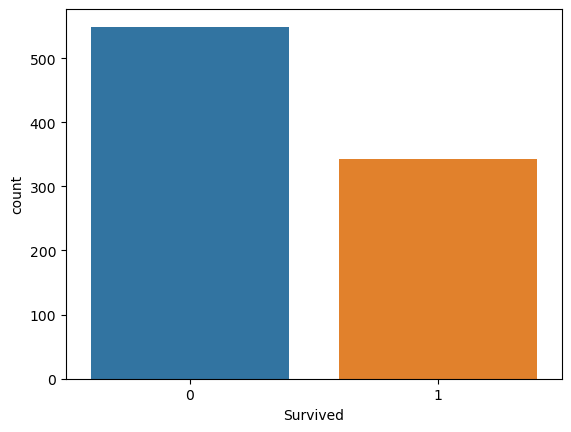

In [5]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax = sns.countplot(x="Survived", data=titanic)
plt.savefig("survived_vs_dead.png")

In [6]:
firstclass=len(titanic[titanic["Pclass"]==1])
survived_first_class=len(titanic[(titanic["Pclass"]==1) * (titanic["Survived"]==1)])
percent=round(100*(survived_first_class/ firstclass),1)
print("portion of person survived in the first class: "+ str(percent) + "% ")

portion of person survived in the first class: 63.0% 


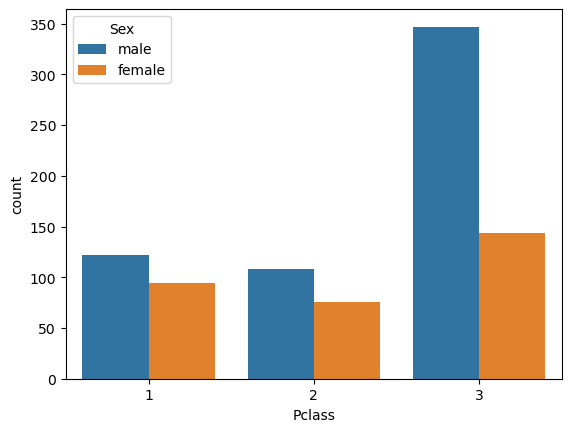

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax = sns.countplot(x="Pclass", hue="Sex",data=titanic)
plt.savefig("Class_and_Sex.png")

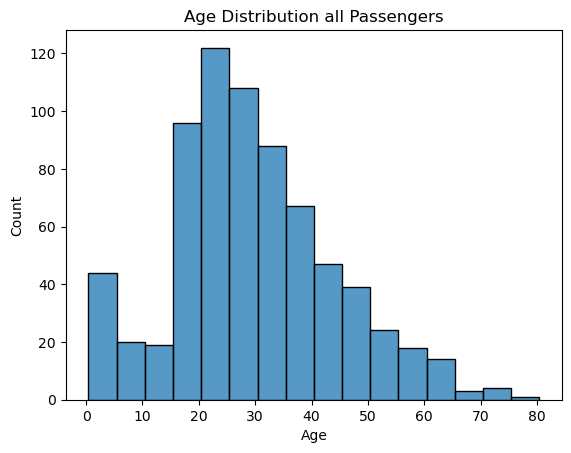

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax = sns.histplot(data=titanic, x="Age", binwidth=5)
plt.title("Age Distribution all Passengers")
plt.savefig("Overall_age_distribution.png")

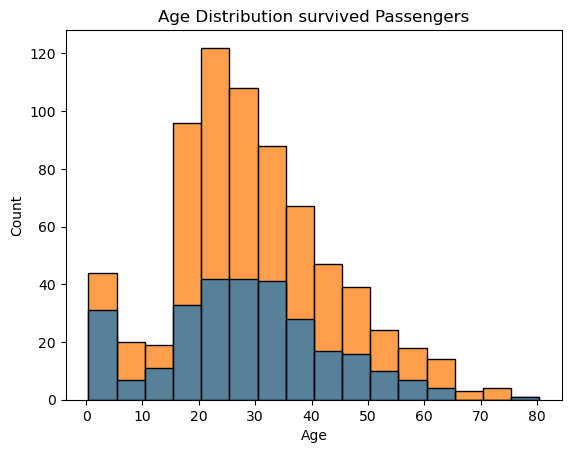

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)

sns.histplot(data=titanic, x="Age", binwidth=5, ax=ax, color="C1")
sns.histplot(data=titanic[titanic["Survived"]==1], x="Age", binwidth=5, ax=ax, color="C0")

plt.title("Age Distribution survived Passengers")
plt.savefig("Age_distribution_survived.png")

In [10]:
average_age_survived=titanic[titanic["Survived"]==1]["Age"].mean()

In [11]:
average_age_dead=titanic[titanic["Survived"]==0]["Age"].mean()

In [12]:
print("average age survived: "+ str(average_age_survived))

average age survived: 28.343689655172415


In [13]:
print("average age drowned: "+ str(average_age_dead))

average age drowned: 30.62617924528302


In [14]:
df=titanic

In [15]:
meanage=df["Age"].mean()

In [16]:
df=df.fillna(value={"Age":meanage})

In [17]:
df[df["Age"]==meanage]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.


In [18]:
survived_firstclass_male=len(df[(df["Survived"]==1) * (df["Pclass"]==1) * (df["Sex"]=="male")])
survived_firstclass_female=len(df[(df["Survived"]==1) * (df["Pclass"]==1) * (df["Sex"]=="female")])
survived_secondclass_male=len(df[(df["Survived"]==1) * (df["Pclass"]==2) * (df["Sex"]=="male")])
survived_secondclass_female=len(df[(df["Survived"]==1) * (df["Pclass"]==2) * (df["Sex"]=="female")])
survived_thirdclass_male=len(df[(df["Survived"]==1) * (df["Pclass"]==3) * (df["Sex"]=="male")])
survived_thirdclass_female=len(df[(df["Survived"]==1) * (df["Pclass"]==3) * (df["Sex"]=="female")])


In [19]:
for Pclass in [1,2,3]:
    for sex in ["male", "female"]: 
        for survived in [1,0]:
            if survived==1:
                print( str(Pclass)+" Class "+sex+" survived: ",len(df[(df["Survived"]==survived) * (df["Pclass"]==Pclass) * (df["Sex"]==sex)]))
            else:
                print( str(Pclass)+" Class "+sex+" drowned: ",len(df[(df["Survived"]==survived) * (df["Pclass"]==Pclass) * (df["Sex"]==sex)]))
    print("")        
            
            
            
            

1 Class male survived:  45
1 Class male drowned:  77
1 Class female survived:  91
1 Class female drowned:  3

2 Class male survived:  17
2 Class male drowned:  91
2 Class female survived:  70
2 Class female drowned:  6

3 Class male survived:  47
3 Class male drowned:  300
3 Class female survived:  72
3 Class female drowned:  72



<Figure size 640x480 with 0 Axes>

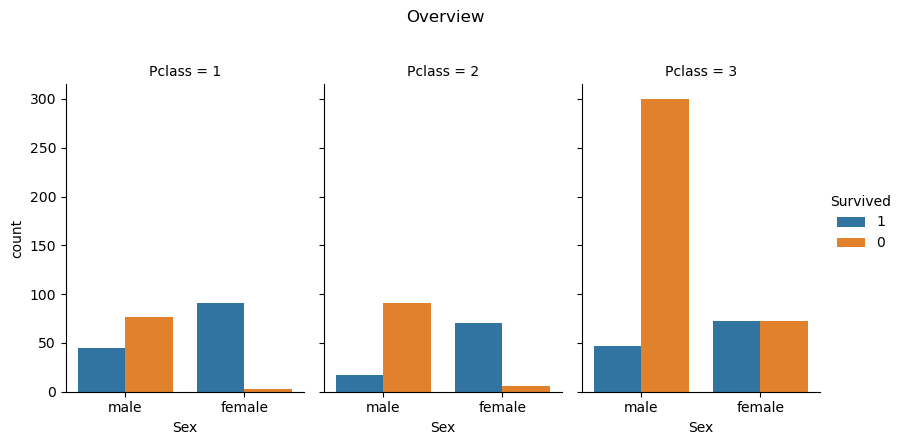

In [26]:
fig=plt.figure()

sns.catplot(data=df,x="Sex",hue="Survived",col="Pclass", kind="count", height=4, aspect=.7, hue_order=[1,0])

plt.suptitle("Overview", y=1.1)
plt.savefig("Overviewplot.png")